<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/Image%20reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install package to read images files
## Popular libraries includes:
1. scikit
2. CV
3. numpy
4. pandas
5. PIL

## Scientific image reader we are using: hyperspy.


#1. Scikit-image

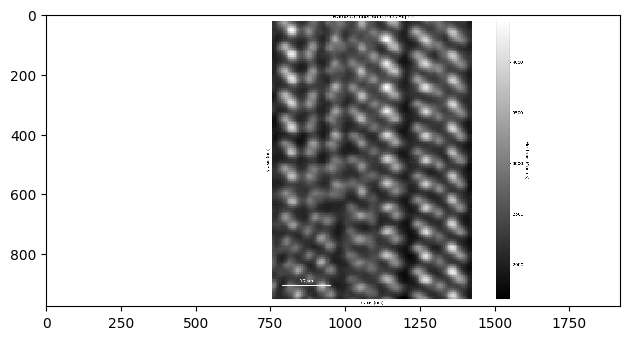

In [2]:
!pip install scikit-image
from skimage import io

# Load the image from the URL
image_url = 'https://github.com/iceaiai/CS-team/blob/d6efe3377dc7aea1c741b314c72c6f8f7c06eaa3/Data_In2Se3/overall.png?raw=true'
image = io.imread(image_url)

# Display the image
io.imshow(image)
io.show()

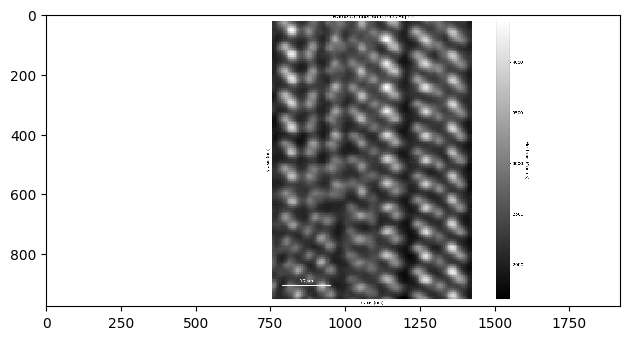

In [7]:
import pandas as pd
from skimage import io

# Step 1: Create a DataFrame with the image URL
image_url = 'https://github.com/iceaiai/CS-team/blob/d6efe3377dc7aea1c741b314c72c6f8f7c06eaa3/Data_In2Se3/overall.png?raw=true'
df = pd.DataFrame({'file_path': [image_url]})

# Step 2: Load and display the first image using skimage
image_pd = io.imread(df['file_path'][0])
io.imshow(image_pd)
io.show()

# 2. CV2
We need to firstly converts the image to a NumPy array, and then decodes it with cv2.imdecode. The image is then displayed using matplotlib after converting it from BGR to RGB format.

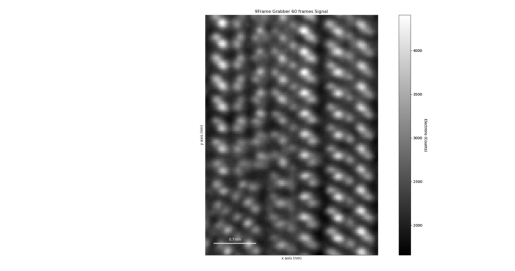

In [3]:
!pip install opencv-python
import cv2
from matplotlib import pyplot as plt # == import matplotlib.pyplot as plt
import numpy as np
import urllib

# Load the image from the URL
image_url = 'https://github.com/iceaiai/CS-team/blob/d6efe3377dc7aea1c741b314c72c6f8f7c06eaa3/Data_In2Se3/overall.png?raw=true'
resp = urllib.request.urlopen(image_url)
image_np = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_np, cv2.IMREAD_COLOR)

# Convert from BGR to RGB for displaying correctly in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 3. Pillow (PIL)

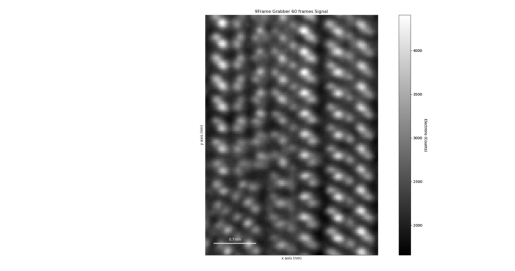

In [16]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the image from the URL
image_url = 'https://github.com/iceaiai/CS-team/blob/d6efe3377dc7aea1c741b314c72c6f8f7c06eaa3/Data_In2Se3/overall.png?raw=true'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

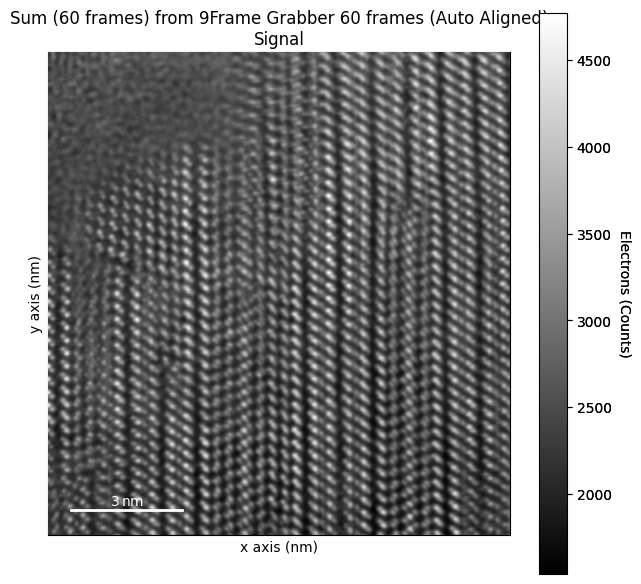

In [25]:
#!pip install hyperspy
import hyperspy.api as hs
import requests
image_url = 'https://github.com/iceaiai/CS-team/blob/c1dd5ee8f70ac14a5356092947571578b1406744/Data_In2Se3/Sum%20(60%20frames)%20from%209Frame%20Grabber%2060%20frames%20(Auto%20Aligned).dm3?raw=true'
response = requests.get(image_url)
with open('downloaded_image.dm3', 'wb') as file:
    file.write(response.content)

s = hs.load('downloaded_image.dm3')

s.plot()

In [44]:
s.axes_manager

Signal axis name,size,,offset,scale,units
x,478,,-0.0,0.026224687695503235,nm
y,499,,-0.0,0.026224687695503235,nm


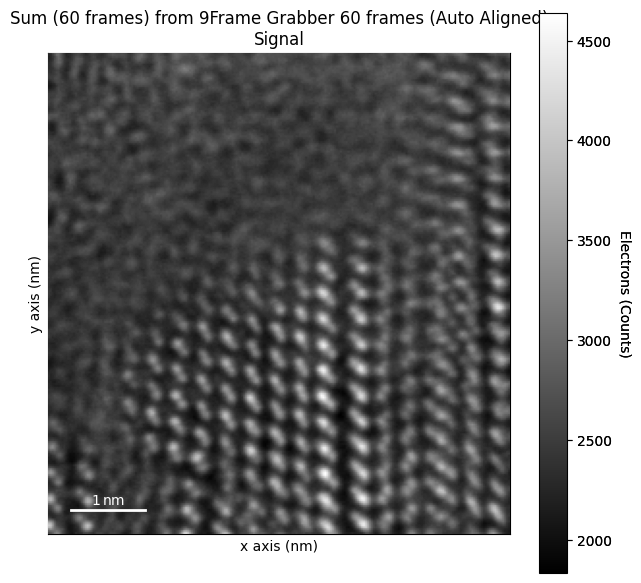

In [47]:
#crop the image by one half pixel
crop_x = int(s.axes_manager[0].size/2)
crop_y = int(s.axes_manager[1].size/2)
s_crop = s.isig[0:crop_x,0:crop_y]
s_crop.plot()

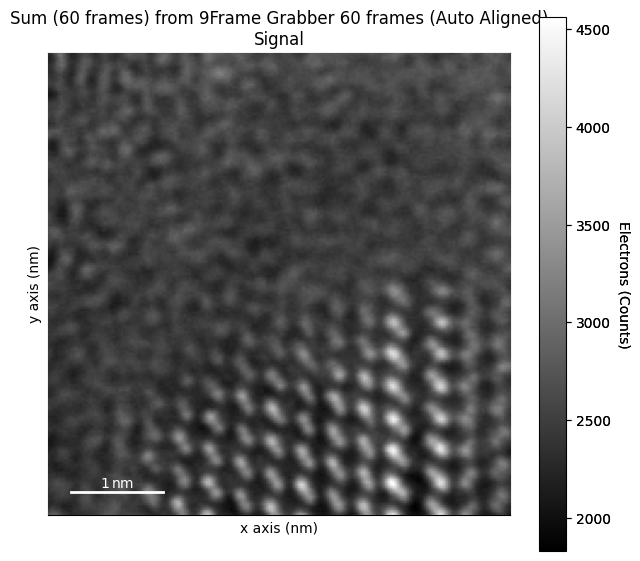

In [50]:
#crop the image by one scale
crop_x = 5. #5nm
crop_y = 5. #5nm
s_crop = s.isig[0:crop_x,0:crop_y]
s_crop.plot()

# The Fast Fourier Transformation

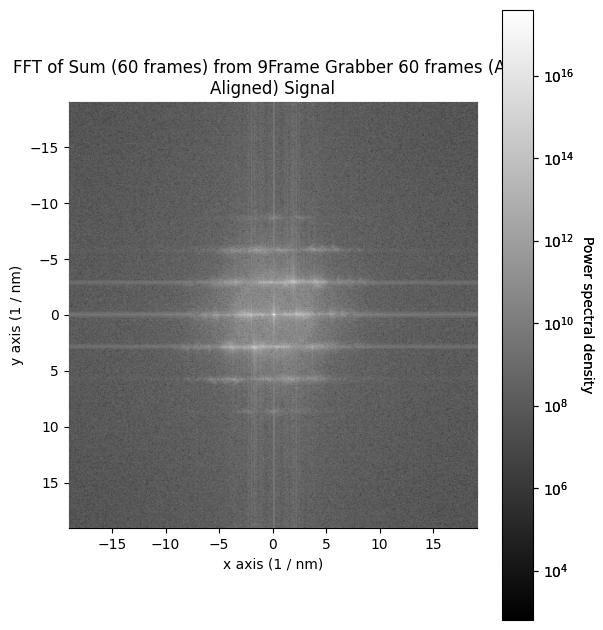

In [53]:
fft_shifted = s.fft(shift=True)
fft_shifted.plot(True)

# Inverse FFT

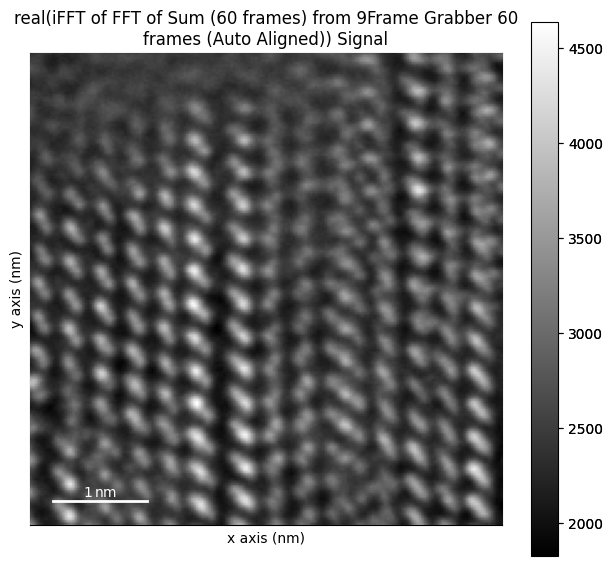

In [61]:
crop_x = 5. #5nm
crop_y = 5. #5nm
s_crop = s.isig[2.:crop_x+2.,2.:crop_y+2.]
s_crop_ifft = s_crop.fft(shift=True).ifft(shift=True)
s_crop_ifft.plot()

In [ ]:
crop_x = 5. #5nm
crop_y = 5. #5nm
s_crop = s.isig[2.:crop_x+2.,2.:crop_y+2.]
s_crop_ifft = s_crop.fft(shift=True).ifft(shift=True)
s_crop_ifft.plot()